# Cepstrum smoothing

A technique that is supposed to be used for "homomorphic deconvolution".

Resources:
- [ESTIMATING TRANSFER FUNCTION FROM AIR TO BONE CONDUCTION USING SINGING VOICE](https://ccrma.stanford.edu/~sywon/research/OnesOwnHearing/SingingTF/ICMC2005.pdf) by Won and Berger.
- Proakis 1996 Digital Signal Processing p. 355

In [34]:
import time

import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

fft = np.fft.fft
ifft = np.fft.ifft

In [35]:
INPUT_FILE = "data/martin_dcx1re_c414_left_pickup_right.wav"

In [36]:
data, sample_rate_Hz = sf.read(INPUT_FILE)
ydata, xdata = data.T

## Naive deconvolution

In [37]:
w = np.blackman(len(xdata))
X = fft(w * xdata, 2048)
Y = fft(w * ydata, 2048)
H = Y/X

In [38]:
def freqresp(H, fig=None, ax=None):
    f = np.linspace(0, sample_rate_Hz, len(H))
    end = len(f)//2
    f_ = f[0:end]
    H_ = 20*np.log10(np.abs(H[0:end]))
    
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(8, 3))
        
    ax.semilogx(f_, H_)
    ax.grid()
    fig.tight_layout()
    return fig, ax

pass

## CEPSTRUM smoothing individual parts

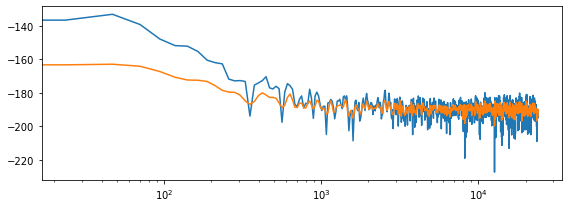

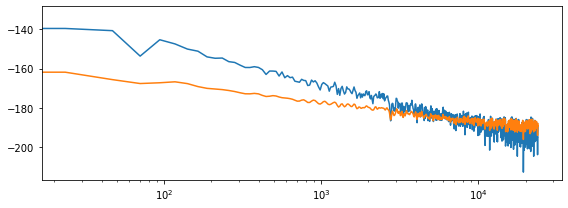

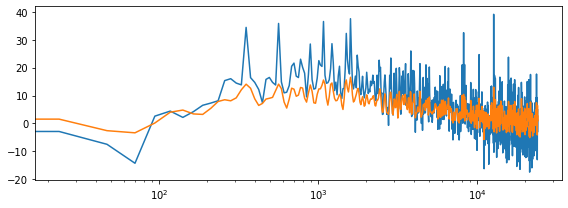

In [54]:
# Smoothing window
n = np.arange(2048)
n_start = 0
n_stop = 500
w = np.ones(len(n)) * (n_start <= n) * (n <= n_stop)

# Convert to cepstrum-time-domain and apply filtering window
cx = w * np.fft.ifft(np.log(np.abs(X)))
cy = w * np.fft.ifft(np.log(np.abs(Y)))

# Convert to cepstrum-frequency-domain
Cx = np.fft.fft(cx)
Cy = np.fft.fft(cy)

# Convert to normal frequency domain
Xc = np.exp(Cx)
Yc = np.exp(Cy)

# Calculate frequency response
Hc = Yc/Xc

fig, ax = freqresp(X)
freqresp(Xc, fig, ax)

fig, ax = freqresp(Y)
freqresp(Yc, fig, ax)

fig, ax = freqresp(H)
freqresp(Hc, fig, ax)

pass

## Impulse response

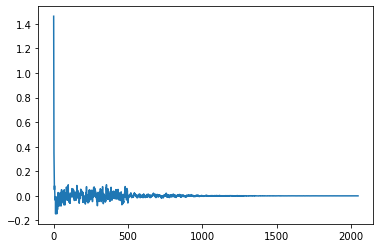

In [55]:
h = np.real(ifft(Hc))
plt.plot(h)
# sf.write(f"ir_{int(time.time())}.wav", h, samplerate=sample_rate_Hz)